<a href="https://colab.research.google.com/github/navrgithub/NLP_Authorship_Attribution/blob/main/CNN_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP group project/data')

In [ ]:
import csv
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [ ]:
import pandas as pd
df_nw= pd.read_csv("final_task1_data.csv")
print(df_nw)

                                                      T1  \
0      turkey and russia announce ceasefire in northw...   
1      latest headlines on cnn business tl;dr the fed...   
2      explore chernobyl's exclusion zone in 360â° (...   
3      china and japan's budding relationship in the ...   
4      a state-by-state breakdown of us coronavirus c...   
...                                                  ...   
11545  Fly in a WWI fighter plane red hook, new york ...   
11546  China coronavirus: Eating wild animals made il...   
11547  Is DNA the key to protecting Earth's tallest s...   
11548  The 30 most troubling lines from Donald Trump'...   
11549  Explore Chernobyl's exclusion zone in 360Â° ch...   

                                                      T2  Same_OR_Not  
0      no one can protect these syrian kids from the ...            1  
1      coronavirus threat to tokyo 2020 is 'heartbrea...            1  
2      ski at austria's soelden resort on saturday, t...       

In [ ]:
df = df_nw

In [ ]:
import pandas as pd

# combine the two columns into one by appending them
df['text'] = df['T1'] + ' ' + df['T2']
df = df.drop('T1', axis=1)
df = df.drop('T2', axis=1)
df = df.rename(columns={'Same_OR_Not': 'label'})


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# create a sample dataframe
# data = {'id': [1, 2, 3],
#         'text': ['This is the first paragraph', 'This is the second paragraph', 'This is the third paragraph']}
# df = pd.DataFrame(data)

# initialize the CountVectorizer object
cv = CountVectorizer()

# fit and transform the text data
text_counts = cv.fit_transform(df_nw['text'])

# convert the text_counts to a pandas dataframe



In [ ]:
# result = df_nw
result = df

In [ ]:
result['y'], _ = pd.factorize(result['label'])

In [ ]:
result.drop('label', axis=1, inplace=True)

In [ ]:
# Step 1: Preprocess the text data
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string



In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_dataframe(df, column):
    df[column] = df[column].str.lower() # convert text to lowercase
    df[column] = df[column].str.translate(str.maketrans("", "", string.punctuation)) # remove punctuation
    stop_words = set(stopwords.words("english")) # get list of stop words
    lemmatizer = WordNetLemmatizer() # initialize lemmatizer
    return df


df = preprocess_dataframe(result, "text")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,text,y
0,turkey and russia announce ceasefire in northw...,0
1,latest headlines on cnn business tldr the fede...,0
2,explore chernobyls exclusion zone in 360â° cn...,0
3,china and japans budding relationship in the t...,0
4,a statebystate breakdown of us coronavirus cas...,0
...,...,...
11545,fly in a wwi fighter plane red hook new york c...,0
11546,china coronavirus eating wild animals made ill...,0
11547,is dna the key to protecting earths tallest sp...,0
11548,the 30 most troubling lines from donald trumps...,0


In [ ]:
# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
df=df.dropna()
X = df['text'] # text data

y = df['y'] # label data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Step 3: Vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_test_vectorized

<2310x24849 sparse matrix of type '<class 'numpy.float64'>'
	with 929332 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vectorized)

  (0, 6964)	0.0786406597187591
  (0, 2812)	0.021414028241350566
  (0, 5231)	0.05858375333243995
  (0, 8214)	0.06918847952654436
  (0, 14222)	0.11485634245155701
  (0, 7462)	0.013007388372027676
  (0, 20969)	0.046166145751029224
  (0, 7135)	0.05872077195937421
  (0, 3563)	0.04823545664077269
  (0, 23073)	0.08722860657745717
  (0, 17671)	0.0192130459474856
  (0, 17813)	0.05305407235675583
  (0, 20071)	0.029396567380838557
  (0, 11628)	0.04361430328872858
  (0, 23412)	0.036356133440787225
  (0, 22999)	0.04361430328872858
  (0, 15220)	0.03775390238427609
  (0, 19259)	0.04006760747793917
  (0, 2827)	0.028683271740715565
  (0, 18190)	0.05928913904599927
  (0, 11711)	0.029492159878268687
  (0, 11971)	0.06897466031559935
  (0, 17673)	0.02541843669559465
  (0, 16048)	0.048384847425169464
  (0, 21951)	0.0974033665636831
  :	:
  (9239, 8939)	0.07488916476930166
  (9239, 22097)	0.012269587901558748
  (9239, 16134)	0.010322850328985245
  (9239, 17106)	0.10230454261258379
  (9239, 2050)	0.0134740397

In [ ]:
X_train_vectorized

<9240x24849 sparse matrix of type '<class 'numpy.float64'>'
	with 3764980 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion_mat)



Accuracy: 0.5025974025974026
Precision: 0.49808049535603716
Recall: 0.49813626460834126
F1-score: 0.49606516584325866
Confusion matrix:
 [[712 501]
 [648 449]]


DEEp Learning model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df['text'].values # text data

y = df['y'].values # label data
X = vectorizer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.toarray())
X_test_tensor = torch.Tensor(X_test.toarray())
y_train_tensor = torch.Tensor(y_train).long()
y_test_tensor = torch.Tensor(y_test).long()


In [ ]:
# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)



In [ ]:
X_train_tensor.shape[1]

24849

In [ ]:
# # Define model architecture


# Define model architecture
class TextClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 512)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(512,256)
        # self.dropout = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        # self.dropout = nn.Dropout(p=0.5)
        self.fc5 = nn.Linear(64,32)
        self.fc6 = nn.Linear(32,16)
        # self.dropout = nn.Dropout(p=0.5)
        self.fc7 = nn.Linear(16, num_classes)
        self.Softmax = nn.Softmax(dim=1)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        # x = self.dropout(x)
        x = self.fc3(x)
        x = self.fc4(x)
        # x = self.dropout(x)
        x = self.fc5(x)
        x = self.fc6(x)
        # x = self.dropout(x)
        x = self.fc7(x)
        x= self.Softmax(x)
        return x


In [ ]:
# Create model, loss function, and optimizer
model = TextClassifier(num_classes=10)
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.1)

loss_function = nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [ ]:
epochs = 5
l1=[]
l2=[]
running_lossy = 0.
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    optimizer.zero_grad()

    predictions = model.forward(inputs) 
    loss = loss_function(predictions.squeeze(), outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
  l1.append(running_loss / len(train_loader))
  
  running_loss = 0.
  with torch.no_grad():
    for data in test_loader:
      inputs, outputs = data
      predictions = model.forward(inputs)
      loss = loss_function(predictions.squeeze(), outputs)
      running_loss += loss.item()
      val_loss = running_loss / len(test_loader)
  l2.append(val_loss)

  print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch: 1, Train Loss: 2.2890, Val Loss: 2.2764
Epoch: 2, Train Loss: 2.2606, Val Loss: 2.2422
Epoch: 3, Train Loss: 2.2154, Val Loss: 2.1811
Epoch: 4, Train Loss: 2.1226, Val Loss: 2.0483
Epoch: 5, Train Loss: 1.9877, Val Loss: 1.9516


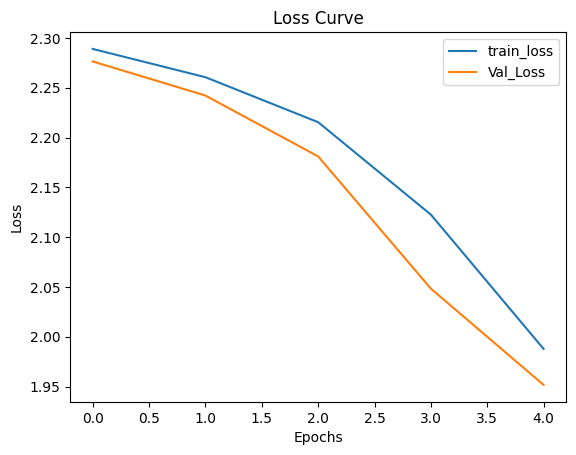

In [ ]:

import matplotlib.pyplot as plt

plt.plot(np.arange(epochs),l1 , label = "train_loss")
plt.plot(np.arange(epochs),l2 , label = "Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
predictions = []
with torch.no_grad():
  for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    model = model.to(device)
    output = model(inputs)
    _, pred = torch.max(output.data, 1)
    predictions.extend(pred.cpu().numpy().tolist())
test_accuracy = accuracy_score(y_test.flatten(), predictions)

In [ ]:
batch_size = 32
num_sample = len(y_test) / 9
num_samples = len(y_test) 
num_batches = num_samples // batch_size
correct_predictions = 0

with torch.no_grad():
    for i in range(num_batches):
        batch_start = i * batch_size
        batch_end = (i + 1) * batch_size
        X_batch = torch.tensor(X_test[batch_start:batch_end].toarray(), dtype=torch.float32).to(device)
        y_batch = torch.tensor(y_test[batch_start:batch_end]).to(device)
        predictions = model(X_batch)
        # Get the index of the predicted class with the highest probability
        _, predicted = torch.max(predictions, 1)
        # Count the number of correct predictions in this batch
        correct_predictions += (predicted == y_batch).sum().item()

# Calculate the overall accuracy
accuracy = 100 * correct_predictions / num_samples
print('Testing Accuracy: {:.5f}%'.format(accuracy))


Testing Accuracy: 78.63636%


In [ ]:
test_accuracy

0.7876623376623376

In [ ]:
predictions = []
tz=[]
# with torch.no_grad():
for inputs, labels in test_loader:
  inputs, labels = inputs.to(device), labels.to(device)
  model = model.to(device)
  output = model(inputs)
  _, pred = torch.max(output.data, 1)
  predictions.extend(pred.cpu().numpy().tolist())
predictions = np.array(predictions)
tz.append(accuracy_score(y_test.flatten(), predictions))


In [ ]:
set(predictions)

{0}